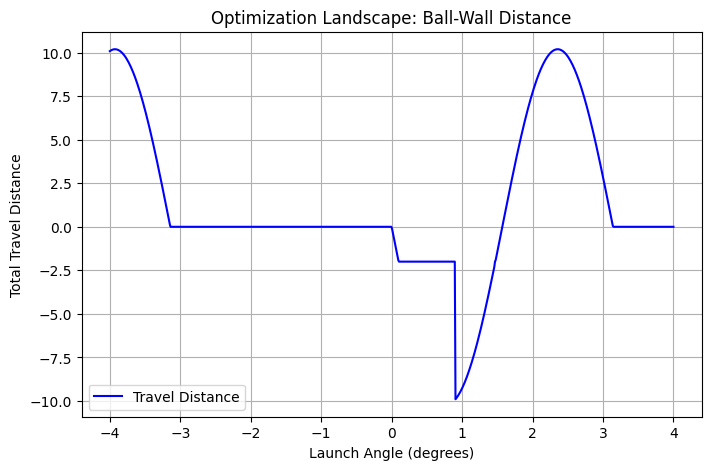

In [4]:
import numpy as np
import matplotlib.pyplot as plt

def ball_wall_distance(angle, wall_x=2.0, initial_speed=10.0):
    """
    Compute the travel distance of a ball that hits a wall and bounces off.
    """
    # angle_rad = np.radians(angle)
    angle_rad = angle
    
    # Initial velocity components
    vx = np.cos(angle_rad) * initial_speed
    vy = np.sin(angle_rad) * initial_speed
    
    if vy <= 0:
        return 0  # Ball moving away from the wall, invalid case
    
    if vx >= 0:
        # Time to reach the wall
        t_wall = wall_x / vx
        
        t_land = 2 * vy / 9.81
        
        if t_wall < t_land:
            # Position at impact
            y_at_wall = vy * t_wall - 0.5 * 9.81 * t_wall**2
            
            if y_at_wall < 2.0:
                return wall_x  # Ball hits the ground before reaching the wall
            else:
                # Time until it lands after bouncing off
                t_land = 2 * vy / 9.81
                
                # Additional horizontal distance traveled
                x_travel = vx * t_land
                
                return x_travel
        else:
            x_travel = vx* t_land
            return x_travel
    else:
        t_land = 2 * vy / 9.81
        
        # Additional horizontal distance traveled
        x_travel = vx * t_land
        
        return x_travel

# Angles to test
angles = np.linspace(-4, 4, 800)
distances = np.array([-ball_wall_distance(a) for a in angles])

# Plot the landscape
plt.figure(figsize=(8, 5))
plt.plot(angles, distances, label='Travel Distance', color='b')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Total Travel Distance')
plt.title('Optimization Landscape: Ball-Wall Distance')
plt.legend()
plt.grid()
plt.show()


Epoch 0, Loss: 0.1082
Epoch 50, Loss: 0.0228
Epoch 100, Loss: 0.0006
Epoch 150, Loss: 0.0018
Epoch 200, Loss: 0.0007
Epoch 250, Loss: 0.0137
Epoch 300, Loss: 0.0007
Epoch 350, Loss: 0.0009
Epoch 400, Loss: 0.0080
Epoch 450, Loss: 0.0028
Epoch 500, Loss: 0.0011
Epoch 550, Loss: 0.0003
Epoch 600, Loss: 0.0003
Epoch 650, Loss: 0.0005
Epoch 700, Loss: 0.0006
Epoch 750, Loss: 0.0019


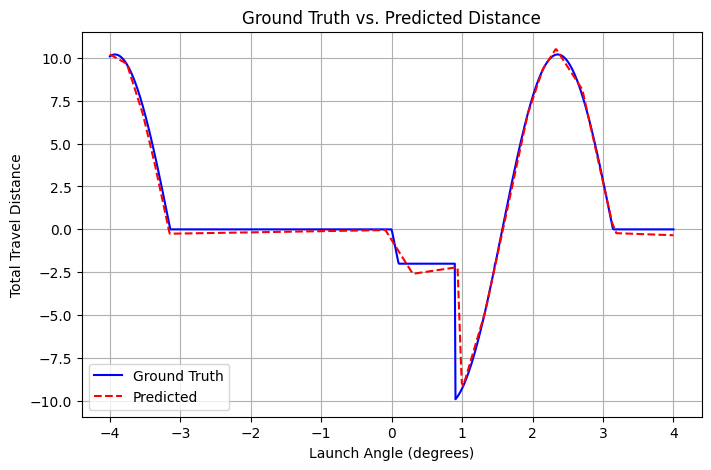

In [16]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Generate dataset
angles = np.linspace(-4, 4, 800)
distances = np.array([-ball_wall_distance(a) for a in angles])

# Normalize data
angles_norm = angles / 4
distances_norm = distances / np.max(distances)

# Convert to tensors
X_train = torch.tensor(angles_norm, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(distances_norm, dtype=torch.float32).view(-1, 1)

# Create DataLoader with batch size
batch_size = 32
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define neural network model
class DistancePredictor(nn.Module):
    def __init__(self):
        super(DistancePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.ReLU(),
            nn.Linear(16, 16),
            nn.ReLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model = DistancePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01)

# Training loop with batch processing
epochs = 800
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(angles, distances, label='Ground Truth', color='b')
plt.plot(angles, model(X_train).detach().numpy() * np.max(distances), label='Predicted', color='r', linestyle='dashed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Total Travel Distance')
plt.title('Ground Truth vs. Predicted Distance')
plt.legend()
plt.grid()
plt.show()


Epoch 0, Loss: 0.1820
Epoch 50, Loss: 0.1198


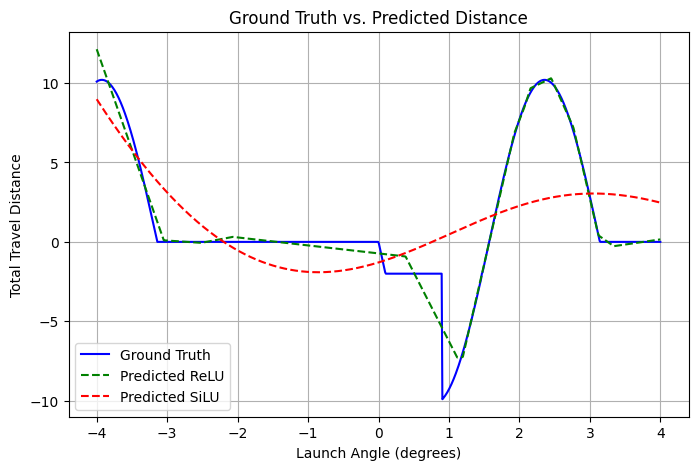

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim


# Generate dataset
angles = np.linspace(-4, 4, 800)
distances = np.array([-ball_wall_distance(a) for a in angles])

# Normalize data
angles_norm = angles / 4
distances_norm = distances / np.max(distances)

# Convert to tensors
X_train = torch.tensor(angles_norm, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(distances_norm, dtype=torch.float32).view(-1, 1)

# Define neural network model
class DistancePredictor(nn.Module):
    def __init__(self):
        super(DistancePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.SiLU(),
            nn.Linear(16, 16),
            nn.SiLU(),
            # nn.Linear(16, 16),
            # nn.SiLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model2 = DistancePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.01)

# Training loop
epochs = 80
for epoch in range(epochs):
    optimizer.zero_grad()
    outputs = model2(X_train)
    loss = criterion(outputs, y_train)
    loss.backward()
    optimizer.step()
    
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(angles, distances, label='Ground Truth', color='b')
plt.plot(angles, model(X_train).detach().numpy() * np.max(distances), label='Predicted ReLU', color='g', linestyle='dashed')
plt.plot(angles, model2(X_train).detach().numpy() * np.max(distances), label='Predicted SiLU', color='r', linestyle='dashed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Total Travel Distance')
plt.title('Ground Truth vs. Predicted Distance')
plt.legend()
plt.grid()
plt.show()

Epoch 0, Loss: 0.1872
Epoch 50, Loss: 0.1201
Epoch 100, Loss: 0.1108
Epoch 150, Loss: 0.0661
Epoch 200, Loss: 0.0116
Epoch 250, Loss: 0.0095
Epoch 300, Loss: 0.0104
Epoch 350, Loss: 0.0113
Epoch 400, Loss: 0.0091
Epoch 450, Loss: 0.0086


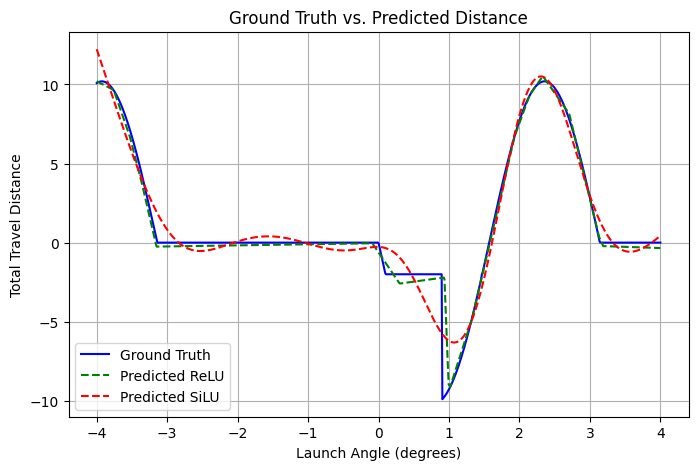

In [20]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader, TensorDataset

# Generate dataset
angles = np.linspace(-4, 4, 800)
distances = np.array([-ball_wall_distance(a) for a in angles])

# Normalize data
angles_norm = angles / 4
distances_norm = distances / np.max(distances)

# Convert to tensors
X_train = torch.tensor(angles_norm, dtype=torch.float32).view(-1, 1)
y_train = torch.tensor(distances_norm, dtype=torch.float32).view(-1, 1)

# Create DataLoader with batch size
batch_size = 500
dataset = TensorDataset(X_train, y_train)
dataloader = DataLoader(dataset, batch_size=batch_size, shuffle=True)

# Define neural network model
class DistancePredictor(nn.Module):
    def __init__(self):
        super(DistancePredictor, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(1, 16),
            nn.SiLU(),
            nn.Linear(16, 16),
            nn.SiLU(),
            nn.Linear(16, 1)
        )
    
    def forward(self, x):
        return self.model(x)

# Initialize model, loss function, and optimizer
model2 = DistancePredictor()
criterion = nn.MSELoss()
optimizer = optim.Adam(model2.parameters(), lr=0.01)

# Training loop with batch processing
epochs = 500
for epoch in range(epochs):
    for batch_X, batch_y in dataloader:
        optimizer.zero_grad()
        outputs = model2(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()
    
    if epoch % 50 == 0:
        print(f'Epoch {epoch}, Loss: {loss.item():.4f}')

# Plot the results
plt.figure(figsize=(8, 5))
plt.plot(angles, distances, label='Ground Truth', color='b')
plt.plot(angles, model(X_train).detach().numpy() * np.max(distances), label='Predicted ReLU', color='g', linestyle='dashed')
plt.plot(angles, model2(X_train).detach().numpy() * np.max(distances), label='Predicted SiLU', color='r', linestyle='dashed')
plt.xlabel('Launch Angle (degrees)')
plt.ylabel('Total Travel Distance')
plt.title('Ground Truth vs. Predicted Distance')
plt.legend()
plt.grid()
plt.show()
